In [1]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')



In [2]:
# importing the Dataset

df= pd.read_csv('big_mart.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# lets check the size of the Dataset
df.shape

(8523, 12)

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. There are null values in features: Item_Weigth and Outlet_Size
2. There are both numerical and categorical features in Dataset

In [5]:
# lets check count of null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Lets check no. of numerical & categorical columns
print('No. of Categorical Columns:', df.select_dtypes(include='object').shape[1])
print('No. of Numerical Columns:',df.describe().shape[1])

No. of Categorical Columns: 7
No. of Numerical Columns: 5


## Lets start EDA with Univariate analysis

### Lets start with categorical features

In [7]:
df.describe(include= 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
# lets check unique values in all categorical columns

for i in df.describe(include ='object'):
    print(f'{i} count: {df[i].nunique()}')
    print(df[i].unique())
    print('-'*50)

Item_Identifier count: 1559
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
--------------------------------------------------
Item_Fat_Content count: 5
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
--------------------------------------------------
Item_Type count: 16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
--------------------------------------------------
Outlet_Identifier count: 10
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
--------------------------------------------------
Outlet_Size count: 3
['Medium' nan 'High' 'Small']
--------------------------------------------------
Outlet_Location_Type count: 3
['Tier 1' 'Tier 3' 'Tier 2']
--------------------------------------------------
Outlet_Type count: 4
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'


In [9]:
#lets drop 'Item_Identifier' as it has no significance in the analysis
df.drop('Item_Identifier', axis =1, inplace= True)

In [10]:
# lets replace the wrong values in 'Item_Fat_Content'
df.Item_Fat_Content.replace({'low fat':'Low Fat', 'LF':'Low Fat','reg' :'Regular' }, inplace = True)

In [11]:
# lets fill null values in Outlet_Size
df.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [12]:
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0], inplace= True)

In [13]:
# lets plot and find inferences from the dataset

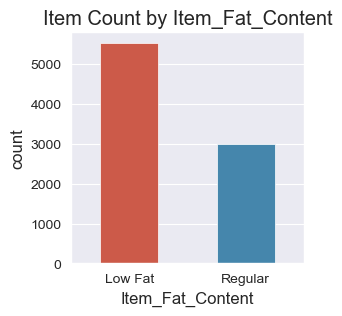

In [14]:
plt.figure(figsize =(3,3))
sns.countplot(x= df.Item_Fat_Content, width =0.5)
plt.title('Item Count by Item_Fat_Content')
plt.show()

In [15]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

*By item fat content, the amount of item with Low fat is nearly double of Regular fat content item.
Majority of the items are Low fat items*

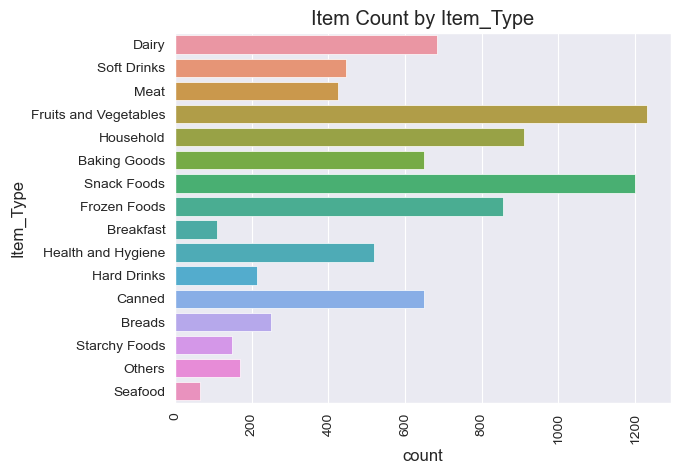

In [16]:
sns.countplot(y=df.Item_Type)
plt.xticks(rotation = 90)
plt.title('Item Count by Item_Type')
plt.show()

*Maximum product available in Big mart are of the Item Type: Fruits & Vegetables followed by Snack Foods.* 

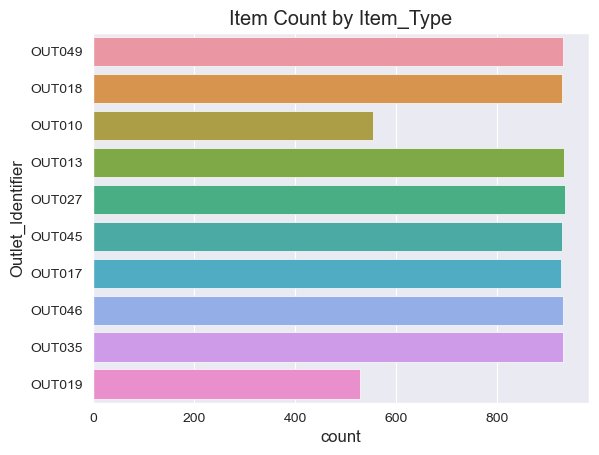

In [17]:
sns.countplot(y=df.Outlet_Identifier)
plt.title('Item Count by Item_Type')
plt.show()

In [18]:
df.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

*Out of total 10 nos. of Outlets: OUT010 & OUT019 have lower set of products, compared to other Outlets*

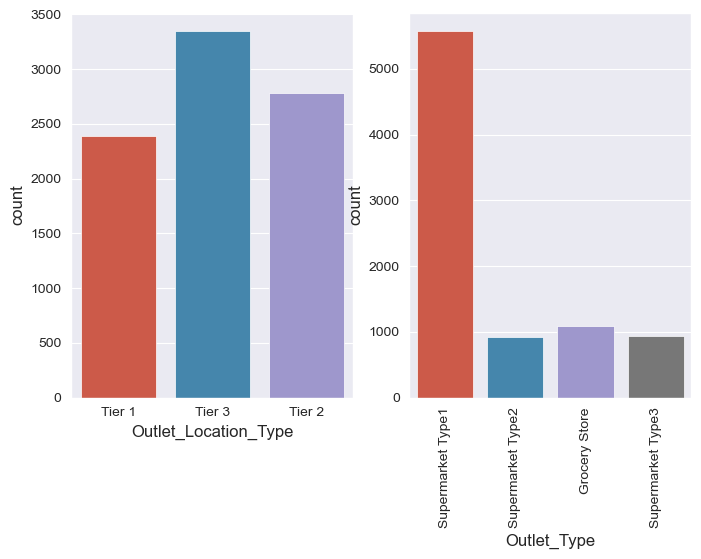

In [19]:
fig, axes= plt.subplots(1,2, figsize =(8,5))
sns.countplot(x=df.Outlet_Location_Type, ax= axes[0])
sns.countplot(x=df.Outlet_Type, ax=axes[1])
plt.xticks(rotation=90)
plt.show()

*Majority of the products lie in Location Type: Tier 3  and Outlet_Type: Supermarket Type 1*

<Axes: xlabel='Outlet_Size', ylabel='count'>

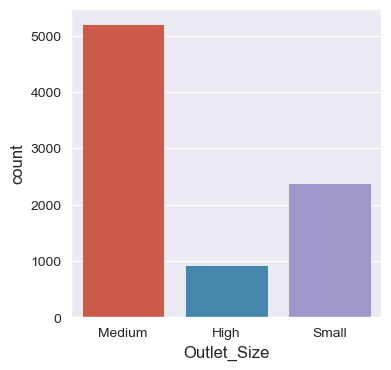

In [20]:
plt.figure(figsize =(4,4))
sns.countplot(x=df.Outlet_Size)

*Majority products are available in Medium size stores*

*Majority of the outlets are Medium Size and all types of Outlet are available in Medium Size*

In [21]:
# checking stats of numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
# lets explore different numerical data

<Axes: xlabel='Item_Weight', ylabel='Count'>

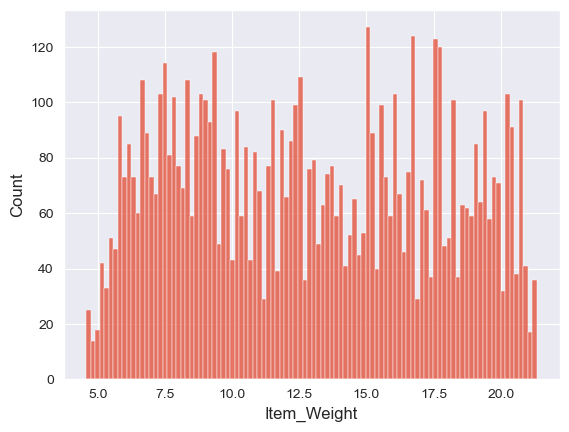

In [23]:
sns.histplot(df.Item_Weight, bins= 100)

*There seems to be no specific pattern in item weight*

<Axes: xlabel='Item_Visibility', ylabel='Count'>

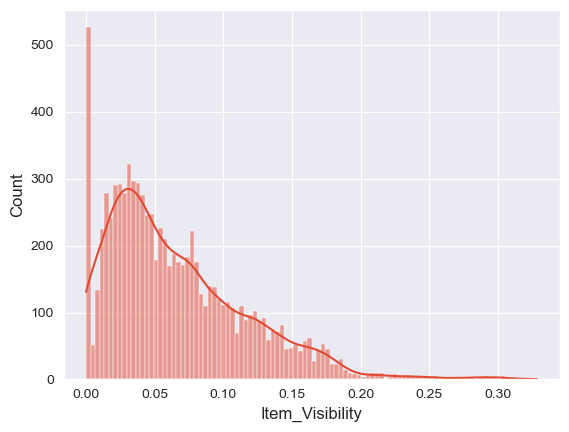

In [24]:
sns.histplot(df.Item_Visibility, bins= 100, kde = True)

*As we can see the Item Visibility is Right-skewed*

<Axes: xlabel='Item_MRP', ylabel='Count'>

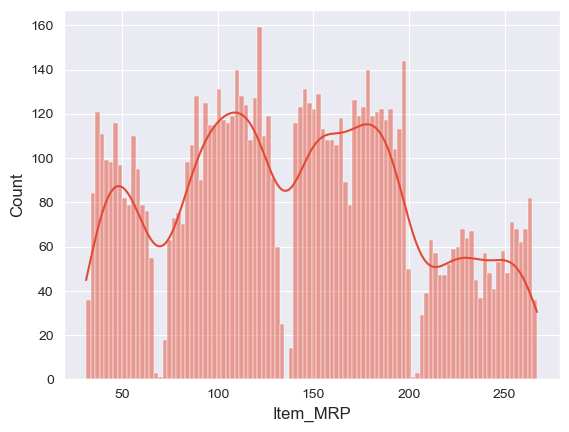

In [25]:
sns.histplot(df.Item_MRP, bins= 100, kde= True)

*There are 4 main Distribution in Item_MRP*

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

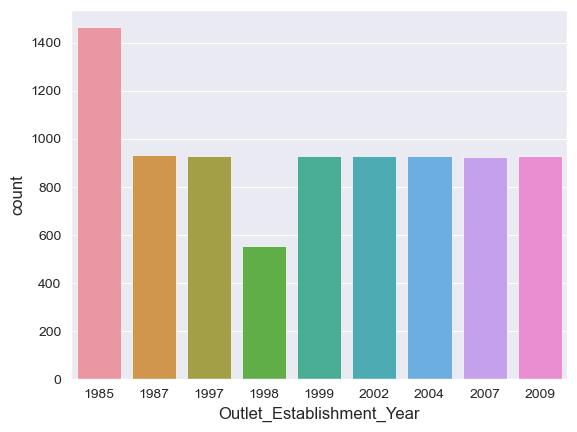

In [26]:
sns.countplot(x=df.Outlet_Establishment_Year)

*Majority of the products are available with Outlets established in 1985, while minimum products are available at Outlets established in 1998*

## Lets begin with Bivariate analysis

### Q: What is the Total No. Outlets in BigMart DataSet?

In [27]:
# The most important feature appears to be 'Item_Outlet_Sales' & 'Outlet_Identifier'
df.Outlet_Identifier.nunique()

10

### Q: What is the Total Revenue recorded by each Outlet in BigMart DataSet?

In [28]:
df.groupby(df.Outlet_Identifier)['Item_Outlet_Sales'].sum().astype(int)

Outlet_Identifier
OUT010     188340
OUT013    2142663
OUT017    2167465
OUT018    1851822
OUT019     179694
OUT027    3453926
OUT035    2268122
OUT045    2036725
OUT046    2118395
OUT049    2183969
Name: Item_Outlet_Sales, dtype: int32

<Axes: xlabel='Outlet_Identifier'>

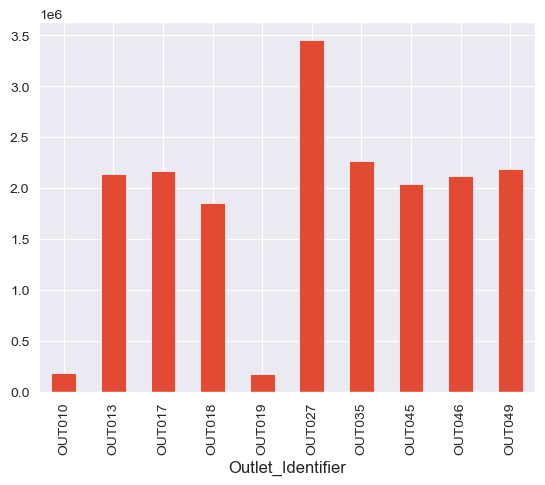

In [29]:
df.groupby(df.Outlet_Identifier)['Item_Outlet_Sales'].sum().plot(kind ='bar')

* Outlet with Maximum sales/ revenue is OUT-027
* Outlet OUT-019 has recorded minimum sales, followed by OUT-010
* All other Outlets have almost similar sales

### Q. Lets find the maximum selling product at OUT-027

In [30]:
# Lets find the maximum selling product at OUT-027

df[df.Outlet_Identifier == 'OUT027'].groupby(df.Item_Type)['Item_Outlet_Sales'].sum().sort_values()

Item_Type
Seafood                   18809.5158
Others                    40513.9300
Starchy Foods             49170.6616
Breakfast                 50432.3526
Hard Drinks               78957.8878
Breads                   110518.8052
Soft Drinks              147822.2476
Health and Hygiene       199084.1870
Meat                     216288.4590
Baking Goods             224172.1968
Dairy                    262317.2104
Canned                   272150.4106
Frozen Foods             316272.3108
Household                378299.5704
Snack Foods              513088.1172
Fruits and Vegetables    576028.1886
Name: Item_Outlet_Sales, dtype: float64

* At OUT-027 the net revenue is $ 3,453,926.05

* Maximum sales recorded in:
    * Fruits and Vegetables ($ 576,028) 
    
    * followed by Snack Foods ($ 513,088)

### Q: Do all the Outlets have all Item_Types available at the stores?

In [31]:
# lets check if all Item_types are available at all Outlets
df.groupby(df.Outlet_Identifier)['Item_Type'].nunique()

Outlet_Identifier
OUT010    16
OUT013    16
OUT017    16
OUT018    16
OUT019    16
OUT027    16
OUT035    16
OUT045    16
OUT046    16
OUT049    16
Name: Item_Type, dtype: int64

*All Outlets have items from all available Item_Type*

### Q: Which product gives maximum revenue to the BigMart?

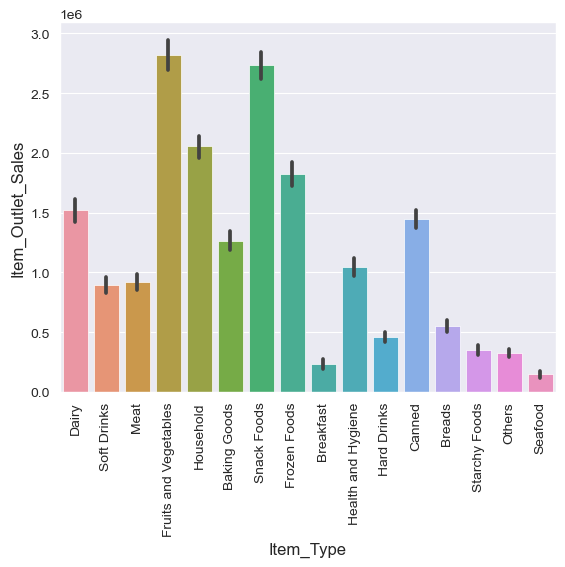

In [48]:
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data= df, estimator = 'sum')
plt.xticks(rotation = 90)
plt.show()

In [33]:
df.groupby(df.Item_Type)['Item_Outlet_Sales'].sum().astype(int).sort_values()

Item_Type
Seafood                   148868
Breakfast                 232298
Others                    325517
Starchy Foods             351401
Hard Drinks               457793
Breads                    553237
Soft Drinks               892897
Meat                      917565
Health and Hygiene       1045200
Baking Goods             1265525
Canned                   1444151
Dairy                    1522594
Frozen Foods             1825734
Household                2055493
Snack Foods              2732786
Fruits and Vegetables    2820059
Name: Item_Outlet_Sales, dtype: int32

### Q: Find Size, Type, Location and Establishment year of all the 10 Oulets?

In [34]:
data= df[['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].reset_index(drop= True)
data

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,OUT010,1998,Medium,Tier 3,Grocery Store
4,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,OUT013,1987,High,Tier 3,Supermarket Type1
8519,OUT045,2002,Medium,Tier 2,Supermarket Type1
8520,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [35]:
Outlets= data[~data.duplicated()].reset_index(drop=True)
Outlets

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,OUT010,1998,Medium,Tier 3,Grocery Store
3,OUT013,1987,High,Tier 3,Supermarket Type1
4,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,OUT045,2002,Medium,Tier 2,Supermarket Type1
6,OUT017,2007,Medium,Tier 2,Supermarket Type1
7,OUT046,1997,Small,Tier 1,Supermarket Type1
8,OUT035,2004,Small,Tier 2,Supermarket Type1
9,OUT019,1985,Small,Tier 1,Grocery Store


* The Outlet: OUT-027 established in year: 1985 is a Medium Size Type 3 Supermarkt in Tier-3 Location and recorded the maximum revenue for the BigMart
* OUT-019 established in year: 1985 is a Small Size Grocery Store in Tier-1 Location and has recorded the minimum revenue.
* OUT-010 established in year: 1998 is a Medium Size Grocery Store in Tier-3 Location and has recorded the 2nd minimum revenue.

### Q: Draw the heatmap for correlation in various features of the DatasSet and give important inferences?

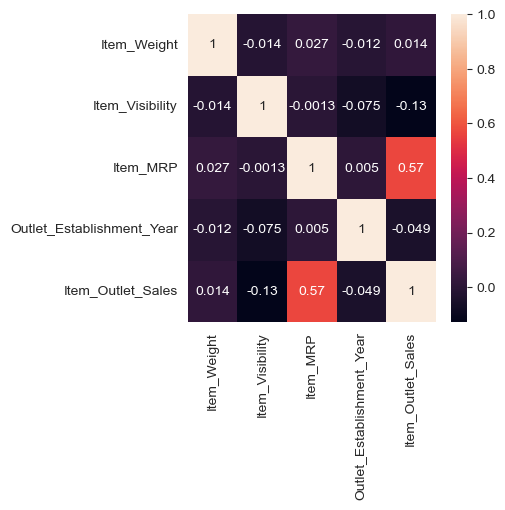

In [36]:
corr = df.corr(numeric_only = True)
plt.figure(figsize =(4,4))
sns.heatmap(corr, annot = True)
plt.show()

* A correaltion coeff of 0.57 between Item_MRP and Item_Outelt_Sales shows: as MRP increases, Sales increases and vice-versa

* There is no significant relation relation among other variables. 

### Q: Draw the pairplot for the DatasSet and give important inferences?

<Figure size 640x480 with 0 Axes>

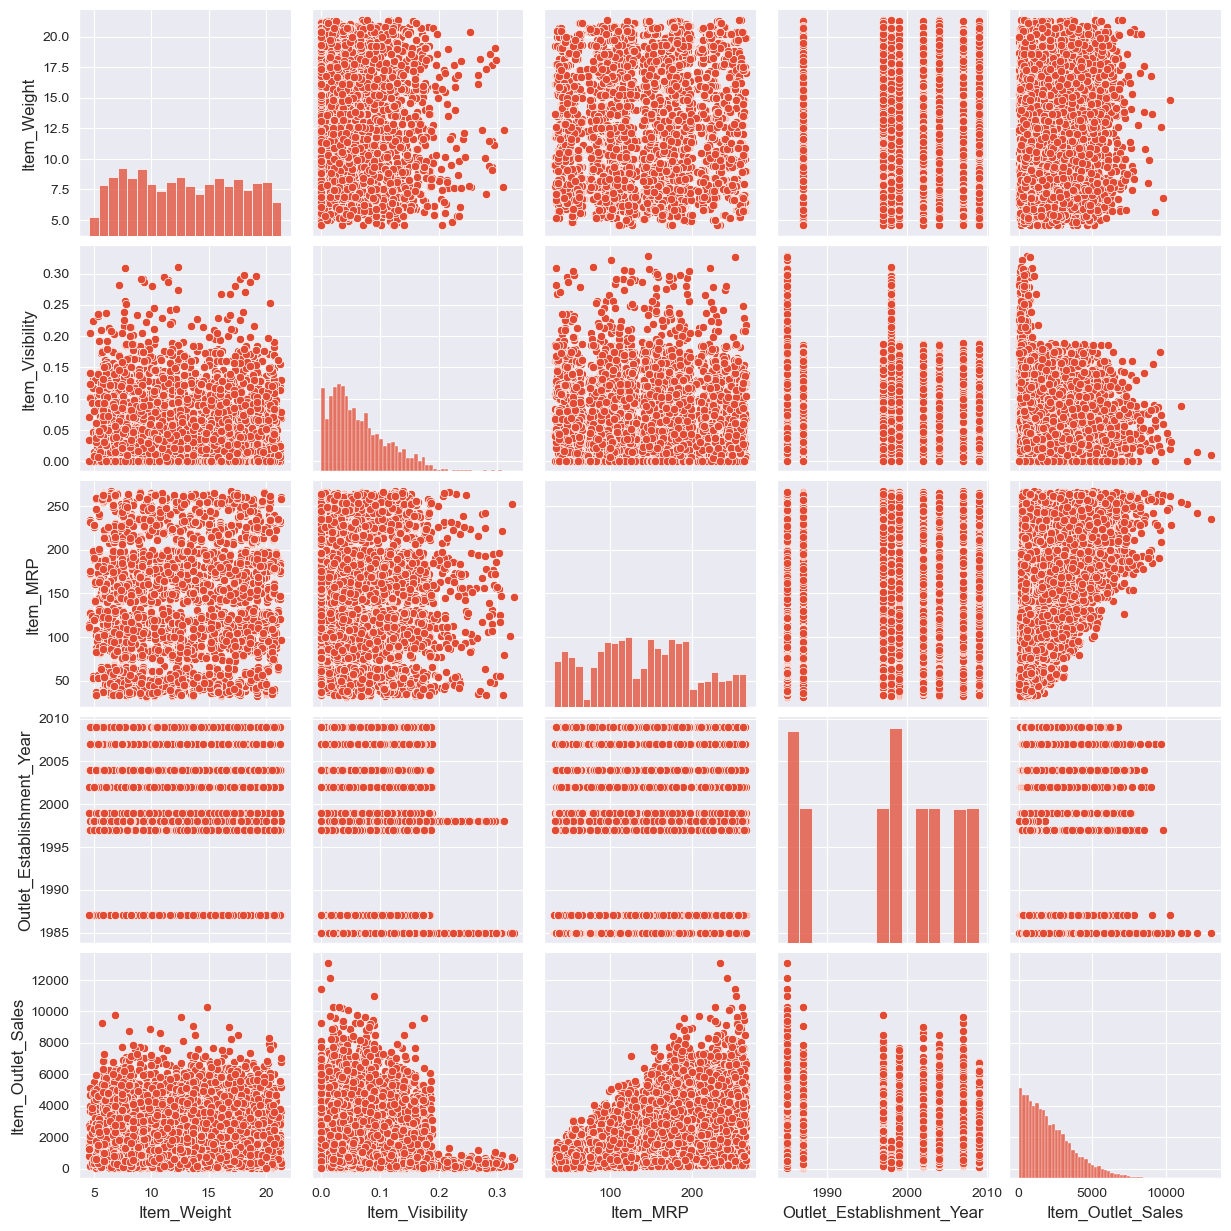

In [37]:
plt.figure(layout= 'tight')
sns.pairplot(df)
plt.xticks(rotation= 90)
plt.show()

* Item visiblity data is Right Skewed
* item Outlet Sales is Right Skewed

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

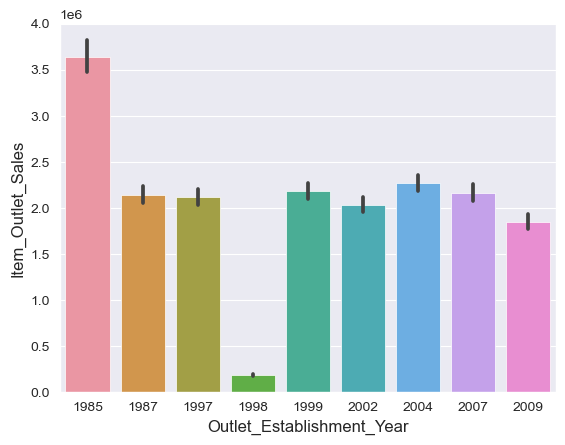

In [38]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data= df, estimator= 'sum')

### Q: Find the relation of Outlet_sales on Outlet Type, Outlet Location type, and Outlet Size ?

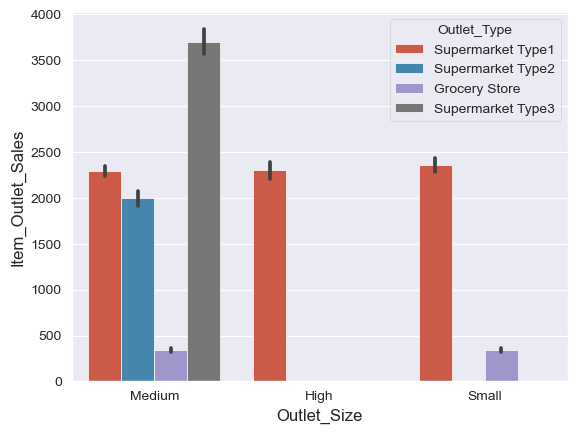

In [39]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales', data=df, hue= 'Outlet_Type')
plt.show()

* Maximum Sales is recorded in Medium Size Outlet: in Supermarket Type 3 marts
* All 4 Outlet_types are available in Medium Size
* There is only a single outlet type of High Size, i.e. Supermarket Type 1
* Supermarket Type 2 and Typ 3 are not available in Small Size

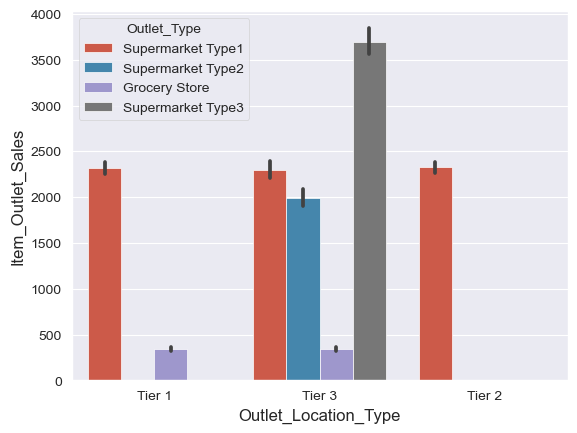

In [40]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', data=df, hue= 'Outlet_Type')
plt.show()

* Maximum Sales is recorded in Tier 3 Locations: in Supermarket Type 3 marts
* All 4 Outlet_types are available in Tier 3 locations
* There is only a single outlet in Tier 2 location, i.e. Supermarket Type 1
* Supermarket Type 2 and Typ 3 are not available in Tier 1 location

### Q: Find the mode of Establishment Year, Location Type, Outlet  Size & Outlet Type?

In [41]:
Outlets.Outlet_Establishment_Year.mode()

0    1985
Name: Outlet_Establishment_Year, dtype: int64

In [42]:
Outlets.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [43]:
Outlets.Outlet_Location_Type.mode()

0    Tier 3
Name: Outlet_Location_Type, dtype: object

In [44]:
Outlets.Outlet_Type.mode()

0    Supermarket Type1
Name: Outlet_Type, dtype: object

In [45]:
Outlets.describe(include='object')

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,10,10,10,10
unique,10,3,3,4
top,OUT049,Medium,Tier 3,Supermarket Type1
freq,1,6,4,6


In [46]:
Outlets.describe(include='object').loc['top',:]

Outlet_Identifier                  OUT049
Outlet_Size                        Medium
Outlet_Location_Type               Tier 3
Outlet_Type             Supermarket Type1
Name: top, dtype: object

* 2 No. of stores were estbalished in 1985 which is the max in any year
* Most of the Stores are Medium Size (6 out of 10)
* Most of the Stores are in Tier 3 location (4 out of 10)
* Most of the Outlet Types are Type 1 Supermarket (6 out of 10)